In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data-sets/twitter.csv')
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


label
0    29720
1     2242
Name: count, dtype: int64


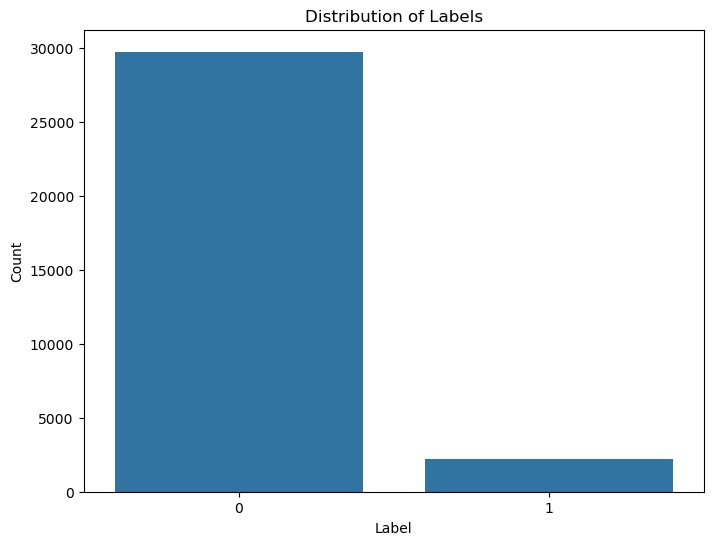

In [7]:
label_counts = df['label'].value_counts()
print(label_counts)

#plot the label counts
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
positive_tweets = df[df['label'] == 0]
positive_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [13]:
positive_sentences = positive_tweets['tweet'].tolist()
len(positive_sentences)

29720

In [17]:
positive_sentences_as_one_string = ' '.join(positive_sentences)
print(positive_sentences_as_one_string)

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦ the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   @user @user welcome here !  i'm   it's so #gr8 !   â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex we are so selfish. #orlando #standwith

(-0.5, 399.5, 199.5, -0.5)

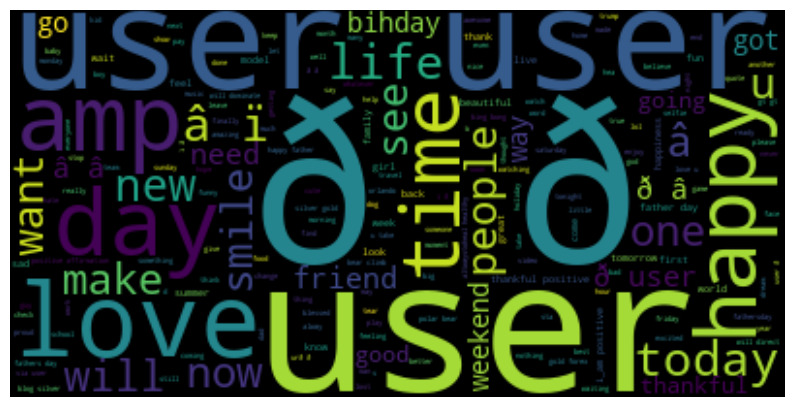

In [21]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate(positive_sentences_as_one_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')



In [22]:
negative_tweets = df[df['label'] == 1]
print(negative_tweets)

          id  label                                              tweet
13        14      1  @user #cnn calls #michigan middle school 'buil...
14        15      1  no comment!  in #australia   #opkillingbay #se...
17        18      1                             retweet if you agree! 
23        24      1    @user @user lumpy says i am a . prove it lumpy.
34        35      1  it's unbelievable that in the 21st century we'...
...      ...    ...                                                ...
31934  31935      1  lady banned from kentucky mall. @user  #jcpenn...
31946  31947      1  @user omfg i'm offended! i'm a  mailbox and i'...
31947  31948      1  @user @user you don't have the balls to hashta...
31948  31949      1   makes you ask yourself, who am i? then am i a...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...

[2242 rows x 3 columns]


In [23]:
negative_tweets_sentences = negative_tweets['tweet'].tolist()

In [25]:
negative_tweets_sentences_as_one = ' '.join(negative_tweets_sentences)
print(negative_tweets_sentences_as_one)

@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren't protesting #trump because a #republican won-they do so because trump has fuhered  &amp;â¦  yes it's  

(-0.5, 399.5, 199.5, -0.5)

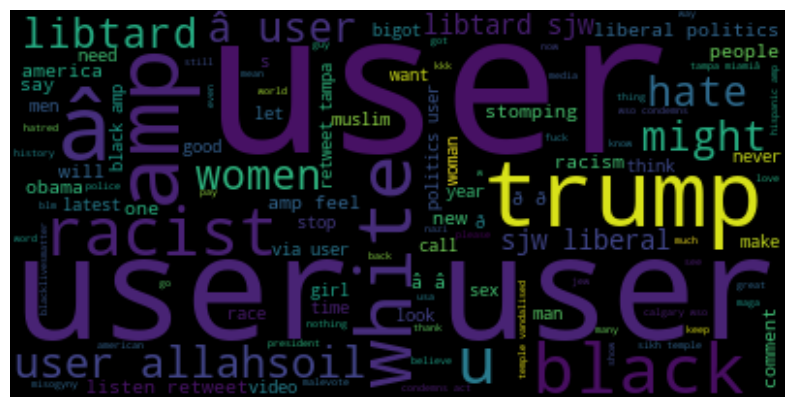

In [26]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
word_cloud = WordCloud().generate(negative_tweets_sentences_as_one)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')



# Task #5 PERFORM DATA CLEANING - REMOVE  PUNCTUATION FROM TEXT

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
Test = '$I love AI & Machine Learning'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine Learning'

In [32]:
df['tweet'] = df['tweet'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df.head()

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [34]:
df['tweet'] = df['tweet'].apply(lambda x: [word for word in x.split()])

In [35]:
df.head()

,id,label,tweet
0,1,0,"[user, when, a, father, is, dysfunctional, and..."
1,2,0,"[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,"[factsguide, society, now, motivation]"
